In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [42]:
df= pd.read_csv('census-income.csv', na_values='?', skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## **Insights**

1. We have categorical values
2. Then the target column we are having is Income

## **What we have to do**
1. We need to encode
2. Eliminate the null values

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Unnamed: 14          0
dtype: int64

In [45]:
df['salary'] = df['Unnamed: 14']
df.drop(['Unnamed: 14'], axis=1, inplace=True)

In [46]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [48]:
df['salary'].value_counts()      # imbalanced dataset

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [49]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [50]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

## **Insights**
1. Majority of our population is having the income more that <-50k
2. Majority of our population are at upper level position
3. We have less number of people who are less educated

In [51]:
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [52]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [53]:
df['native-country'].nunique()

41

In [54]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [55]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

## Inference:
1. Country is having a NaN values, that would be replaced with the United States
2. Workclass NaN values would be replaced by private
3. In occupation, the same thing would be done by Prof-specialy

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [57]:
# Step 1: Dividing
num_feat= df.select_dtypes(exclude=['object']).columns
cat_feat= df.select_dtypes(include=['object']).columns

In [58]:
print('num features= ', num_feat)
print('cat features= ', cat_feat)

num features=  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
cat features=  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')


In [59]:
# step 2: Making Transformer
num_feat_trans= SimpleImputer(strategy= 'mean')
cat_feat_trans= SimpleImputer(strategy= 'most_frequent')

In [60]:
# Step 3: Setting up the transformer
preprocessor= ColumnTransformer(
    transformers=[
        ('num', num_feat_trans, num_feat),
        ('cat', cat_feat_trans, cat_feat),
    ]
)

In [61]:
df_processed= pd.DataFrame(preprocessor.fit_transform(df), columns=list(num_feat)+list(cat_feat))

In [62]:
df_processed.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39.0,77516.0,13.0,2174.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,83311.0,13.0,0.0,0.0,13.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [63]:
df_processed.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
salary            0
dtype: int64

In [64]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   fnlwgt          32561 non-null  object
 2   education-num   32561 non-null  object
 3   capital-gain    32561 non-null  object
 4   capital-loss    32561 non-null  object
 5   hours-per-week  32561 non-null  object
 6   workclass       32561 non-null  object
 7   education       32561 non-null  object
 8   marital-status  32561 non-null  object
 9   occupation      32561 non-null  object
 10  relationship    32561 non-null  object
 11  race            32561 non-null  object
 12  sex             32561 non-null  object
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [65]:
df_processed.duplicated().sum()

24

In [66]:
# dropping
df_processed.drop_duplicates(inplace = True)

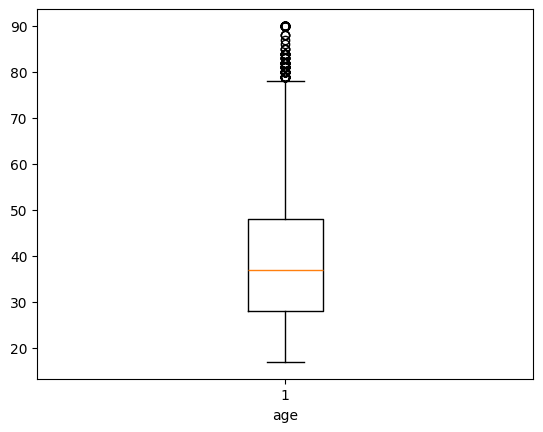

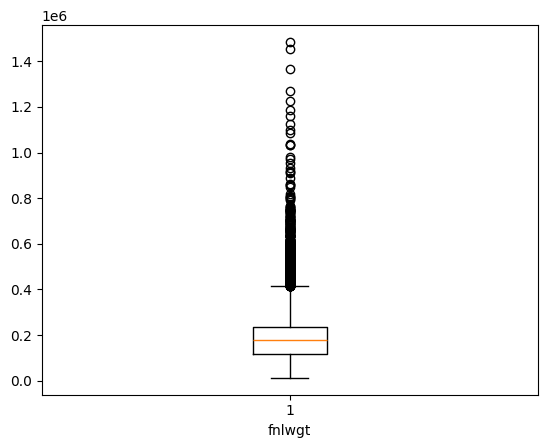

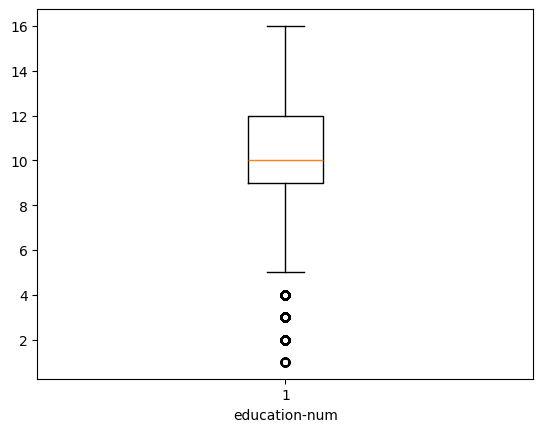

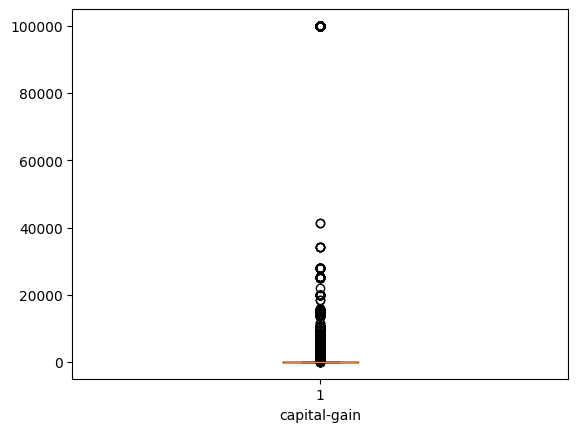

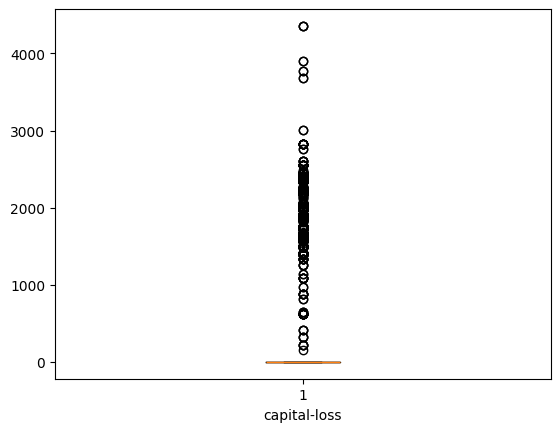

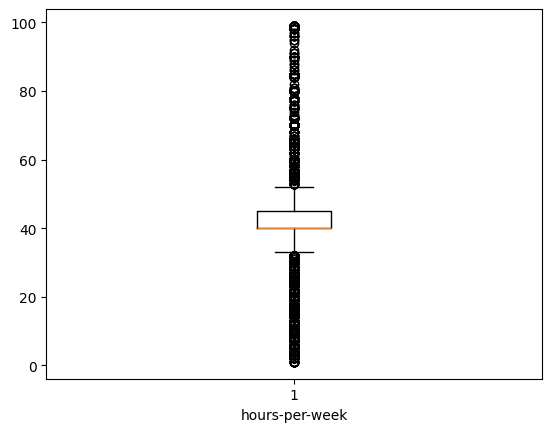

In [67]:
# Outlier Detection

for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [68]:
out_col = ['hours-per-week', 'age', 'fnlwgt', 'education-num']

In [69]:
df_processed.shape

(32537, 15)

In [79]:
for col in num_feat:
    df_processed[col]= df_processed[col].astype(float)

In [80]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   fnlwgt          32537 non-null  float64
 2   education-num   32537 non-null  float64
 3   capital-gain    32537 non-null  float64
 4   capital-loss    32537 non-null  float64
 5   hours-per-week  32537 non-null  float64
 6   workclass       32537 non-null  object 
 7   education       32537 non-null  object 
 8   marital-status  32537 non-null  object 
 9   occupation      32537 non-null  object 
 10  relationship    32537 non-null  object 
 11  race            32537 non-null  object 
 12  sex             32537 non-null  object 
 13  native-country  32537 non-null  object 
 14  salary          32537 non-null  object 
dtypes: float64(6), object(9)
memory usage: 4.0+ MB


In [81]:
# eleminate outliers
for col in out_col:
    Q1= df_processed[col].quantile(0.25)
    Q3= df_processed[col].quantile(0.75)

    IQR= Q3-Q1

    LL= Q1-1.5*IQR
    UL= Q3+1.5*IQR

    df_processed= df_processed[(df_processed[col]>=LL) & df_processed[col]<=UL]

In [82]:
df_processed.shape

(32537, 15)

In [83]:
# String to Int(Encoding) for model
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [84]:
for col in cat_feat:
    df_processed[col]= encoder.fit_transform(df_processed[col])

In [85]:
df_processed.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39.0,77516.0,13.0,2174.0,0.0,40.0,6,9,4,0,1,4,1,38,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,5,9,2,3,0,4,1,38,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,3,11,0,5,1,4,1,38,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,3,1,2,5,0,2,1,38,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,3,9,2,9,5,2,0,4,0


In [86]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   fnlwgt          32537 non-null  float64
 2   education-num   32537 non-null  float64
 3   capital-gain    32537 non-null  float64
 4   capital-loss    32537 non-null  float64
 5   hours-per-week  32537 non-null  float64
 6   workclass       32537 non-null  int32  
 7   education       32537 non-null  int32  
 8   marital-status  32537 non-null  int32  
 9   occupation      32537 non-null  int32  
 10  relationship    32537 non-null  int32  
 11  race            32537 non-null  int32  
 12  sex             32537 non-null  int32  
 13  native-country  32537 non-null  int32  
 14  salary          32537 non-null  int32  
dtypes: float64(6), int32(9)
memory usage: 2.9 MB


In [87]:
# Relation in dataset
df_processed.corr() * 100

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
age,100.000000,-7.644722,3.622409,7.767594,5.774521,6.851456,4.046129,-1.055105,-26.613735,0.175456,-26.374381,2.911596,8.870831,-0.065903,23.403709
fnlwgt,-7.644722,100.000000,-4.338837,0.042859,-1.026014,-1.889804,-2.427163,-2.805324,2.812266,-0.002259,0.886840,-2.149669,2.708943,-6.308033,-0.950235
education-num,3.622409,-4.338837,100.000000,12.266373,7.989194,14.842219,0.350260,35.908532,-6.916132,7.090711,-9.443178,3.201147,1.220548,8.805089,33.527151
capital-gain,7.767594,0.042859,12.266373,100.000000,-3.163918,7.840760,3.150580,3.008463,-4.336788,1.800574,-5.794665,1.115384,4.848900,0.877684,22.333650
capital-loss,5.774521,-1.026014,7.989194,-3.163918,100.000000,5.422924,0.264297,1.679254,-3.413989,0.965344,-6.109831,1.891337,4.557106,0.933502,15.050077
hours-per-week,6.851456,-1.889804,14.842219,7.840760,5.422924,100.000000,4.220028,5.599100,-19.043179,-1.284858,-24.887507,4.192026,22.918712,0.680215,22.965810
workclass,4.046129,-2.427163,0.350260,3.150580,0.264297,4.220028,100.000000,0.482398,-2.042959,0.715890,-5.792020,4.834890,7.157038,-0.166928,0.270174
education,-1.055105,-2.805324,35.908532,3.008463,1.679254,5.599100,0.482398,100.000000,-3.842224,-4.124005,-1.105697,1.430309,-2.743264,7.549527,7.936641
marital-status,-26.613735,2.812266,-6.916132,-4.336788,-3.413989,-19.043179,-2.042959,-3.842224,100.000000,3.485502,18.553159,-6.792973,-12.940245,-2.088450,-19.919931
occupation,0.175456,-0.002259,7.090711,1.800574,0.965344,-1.284858,0.715890,-4.124005,3.485502,100.000000,-3.742874,-0.480743,4.764792,-0.213618,3.451554


<Axes: >

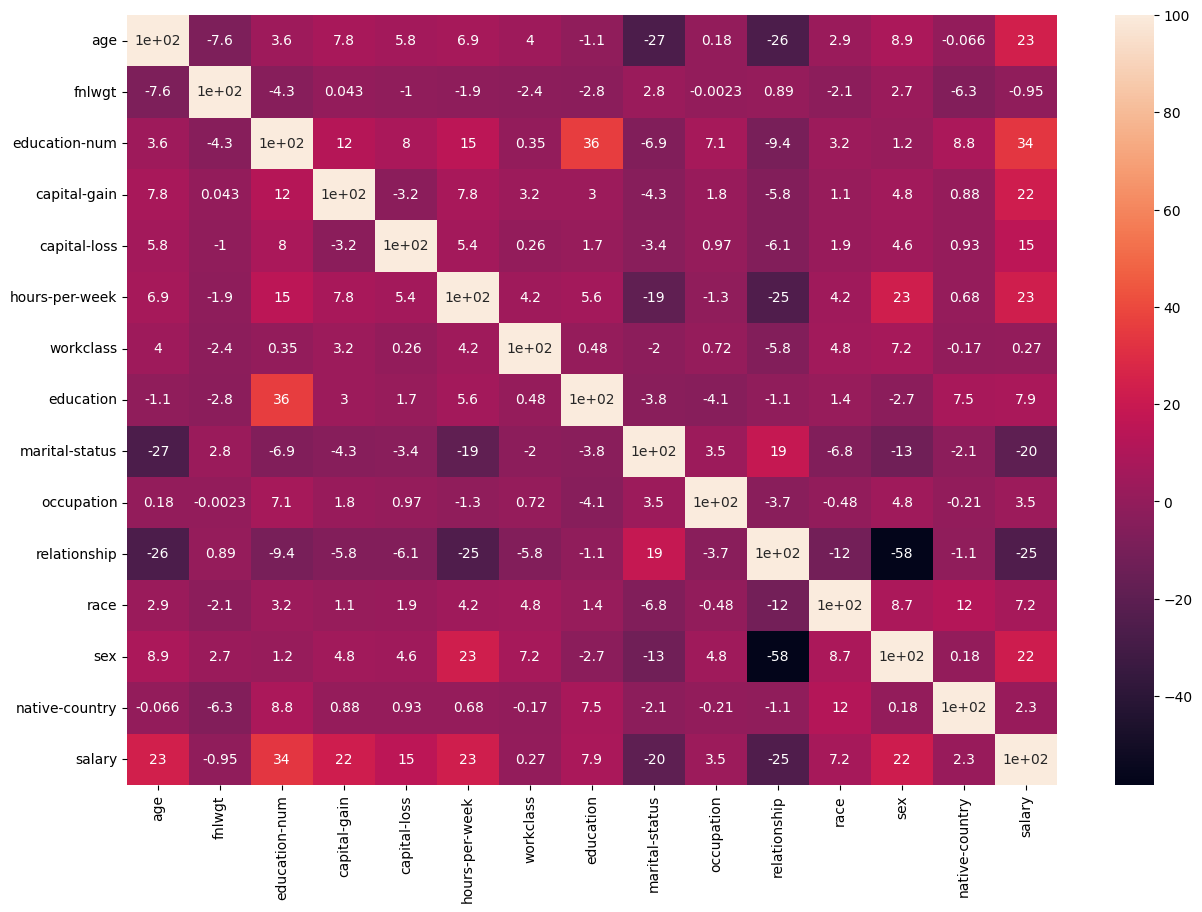

In [89]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_processed.corr()*100, annot=True)

In [91]:
# Model Building
from sklearn.model_selection import train_test_split
x= df_processed.iloc[:, :-1]
x

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39.0,77516.0,13.0,2174.0,0.0,40.0,6,9,4,0,1,4,1,38
1,50.0,83311.0,13.0,0.0,0.0,13.0,5,9,2,3,0,4,1,38
2,38.0,215646.0,9.0,0.0,0.0,40.0,3,11,0,5,1,4,1,38
3,53.0,234721.0,7.0,0.0,0.0,40.0,3,1,2,5,0,2,1,38
4,28.0,338409.0,13.0,0.0,0.0,40.0,3,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0,3,7,2,12,5,4,0,38
32557,40.0,154374.0,9.0,0.0,0.0,40.0,3,11,2,6,0,4,1,38
32558,58.0,151910.0,9.0,0.0,0.0,40.0,3,11,6,0,4,4,0,38
32559,22.0,201490.0,9.0,0.0,0.0,20.0,3,11,4,0,3,4,1,38


In [92]:
y = df_processed['salary']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int32

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 224)

In [94]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
le = LogisticRegression()

le.fit(x_train, y_train)

y_pred= le.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

79.420200778529
[[7065 1650]
 [ 359  688]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      8715
           1       0.29      0.66      0.41      1047

    accuracy                           0.79      9762
   macro avg       0.62      0.73      0.64      9762
weighted avg       0.88      0.79      0.83      9762



In [96]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

y_pred= dtc.predict(x_test)

In [97]:
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

81.3460356484327
[[6457  854]
 [ 967 1484]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7311
           1       0.63      0.61      0.62      2451

    accuracy                           0.81      9762
   macro avg       0.75      0.74      0.75      9762
weighted avg       0.81      0.81      0.81      9762



In [98]:
# Decision Tree
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

y_pred= rfc.predict(x_test)

In [99]:
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

85.79184593321041
[[6912  875]
 [ 512 1463]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7787
           1       0.63      0.74      0.68      1975

    accuracy                           0.86      9762
   macro avg       0.78      0.81      0.79      9762
weighted avg       0.87      0.86      0.86      9762



In [100]:
# SVM - Support Vector Machines
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)

y_pred= svc.predict(x_test)

In [101]:
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

79.64556443351772
[[7420 1983]
 [   4  355]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      9403
           1       0.15      0.99      0.26       359

    accuracy                           0.80      9762
   macro avg       0.58      0.89      0.57      9762
weighted avg       0.97      0.80      0.86      9762



In [102]:
import xgboost as xgb

xg = xgb.XGBClassifier()

xg.fit(x_train, y_train)

y_pred= xg.predict(x_test)

In [103]:
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

87.3079287031346
[[6972  787]
 [ 452 1551]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7759
           1       0.66      0.77      0.71      2003

    accuracy                           0.87      9762
   macro avg       0.80      0.84      0.82      9762
weighted avg       0.88      0.87      0.88      9762

